In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator     #Image data augumentation
from keras.layers import Dense,Activation,Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

Using TensorFlow backend.


In [0]:
def lr_schedule(epoch):
    lrate=0.001
    if epoch > 75:
        lrate=0.0005
    if epoch > 100:
        lrate=0.0003
    return lrate

In [0]:
(xtr,ytr),(xts,yts) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

In [0]:
#Normalization of input data
mean = np.mean(xtrain)
std = np.std(xtrain)
xtrain = (xtrain - mean)/std
xtest = (xtest-mean)/std

In [0]:
#Categorazation of o/p value
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [0]:
xtrain.shape[1:]

(32, 32, 3)

In [0]:
#Build CNN Model
wd = 0.0001
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer = regularizers.l2(wd), input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer = regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer = regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer = regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer = regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer = regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
opt_rms = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=opt_rms,metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=5,
          validation_data=(xtest,ytest),callbacks=[LearningRateScheduler(lr_schedule)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 26s 525us/step - loss: 1.7177 - accuracy: 0.4905 - val_loss: 1.1316 - val_accuracy: 0.6448
Epoch 2/5
50000/50000 [==============================] - 19s 380us/step - loss: 1.0680 - accuracy: 0.6636 - val_loss: 0.9565 - val_accuracy: 0.7094
Epoch 3/5
50000/50000 [==============================] - 19s 381us/step - loss: 0.8936 - accuracy: 0.7270 - val_loss: 0.8288 - val_accuracy: 0.7563
Epoch 4/5
50000/50000 [==============================] - 19s 382us/step - loss: 0.7978 - accuracy: 0.7615 - val_loss: 0.7641 - val_accuracy: 0.7750
Epoch 5/5
50000/50000 [==============================] - 19s 382us/step - loss: 0.7401 - accuracy: 0.7873 - val_loss: 0.7991 - val_accuracy: 0.7714


In [0]:
model_json = model.to_json()

In [0]:
a = open('bipul.txt','w')
a.write('Hello we are learning Python')
a.close()

In [0]:
b = open('bipul.txt','r')
print(b.read())

Hello we are learning Python


In [0]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


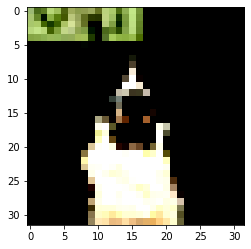

In [0]:
import matplotlib.pyplot as plt
plt.imshow(xtest[345])
plt.show()

In [0]:
np.argmax(model.predict(xtest[345].reshape(1,32,32,3)))

5

In [0]:
np.argmax(ytest[345])

5

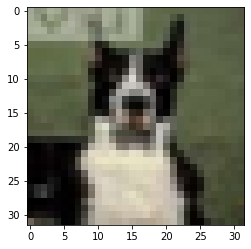

In [0]:
import matplotlib.pyplot as plt
plt.imshow(xts[345])
plt.show()